# Import Required Libraries
Import necessary libraries including os, matplotlib for visualization, and the modules for snapshot_download and AutoMasker.

In [78]:
print("hello world")

hello world


In [79]:
# CatVTON 디렉토리를 sys.path에 추가하여 CatVTON/app.py와 동일하게 모듈 임포트
import os, sys
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, ".."))
catvton_dir = os.path.join(parent_dir, "CatVTON")
if catvton_dir not in sys.path:
    sys.path.insert(0, catvton_dir)

In [80]:
pwd

'c:\\Users\\coldbrew\\VTON-project\\notebook'

In [81]:
import os
import matplotlib.pyplot as plt
from huggingface_hub import snapshot_download
from model.cloth_masker import AutoMasker, vis_mask
from diffusers.image_processor import VaeImageProcessor
from utils import init_weight_dtype, resize_and_crop, resize_and_padding

# Setup AutoMasker Model
Download the CatVTON repository using snapshot_download and initialize the AutoMasker with the correct checkpoint paths and device configuration.

In [82]:
# Download the CatVTON repository
repo_path = snapshot_download(repo_id="zhengchong/CatVTON")

# Initialize the AutoMasker with the correct checkpoint paths and device configuration
automasker = AutoMasker(
    densepose_ckpt=os.path.join(repo_path, "DensePose"),
    schp_ckpt=os.path.join(repo_path, "SCHP"),
    device='cuda'
)
mask_processor = VaeImageProcessor(vae_scale_factor=8, do_normalize=False, do_binarize=True, do_convert_grayscale=True)

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

c:\Users\coldbrew\VTON-project\CatVTON\model\SCHP\__init__.py:93: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(ckpt_path, map_location='cpu')['state

# Load and Preprocess Image
Load a sample image from disk, perform any necessary preprocessing steps, and prepare it as input to the AutoMasker.

In [83]:
def vis_image(image, title=None):
    plt.imshow(image)
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()

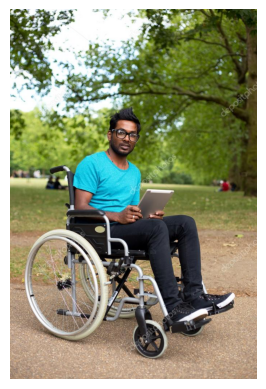

In [84]:
from PIL import Image
import numpy as np
from IPython.display import display
%matplotlib inline
# Load the sample image from disk
image_path = os.path.join("C:/Users/coldbrew/VTON-project/sample_img", "sample01.jpg")

person_image = Image.open(image_path).convert("RGB")
vis_image(person_image)

In [85]:
# person_image

# Generate Mask for the Image
Apply the AutoMasker on the loaded image to generate a mask. Include code to handle the model inference.

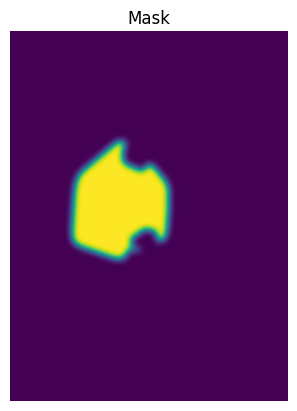

In [86]:
choices=["upper", "lower", "overall"]
cloth_type = choices[0]

width, height = 768, 1024
person_image = resize_and_crop(person_image, (width, height))
# cloth_image = resize_and_padding(cloth_image, (width, height))

mask = resize_and_crop(person_image, (width, height))
mask = automasker(
            person_image,
            cloth_type
        )['mask']

mask = mask_processor.blur(mask, blur_factor=9)
vis_image(mask, title="Mask")
# blur 후에 mask를 0과 1로 이진화
# mask[mask > 127] = 255
# mask[mask <= 127] = 0

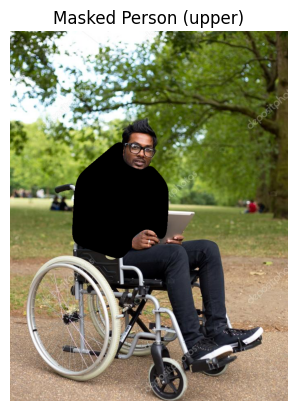

In [87]:
masked_person = vis_mask(person_image, mask)
vis_image(masked_person, title="Masked Person (upper)")

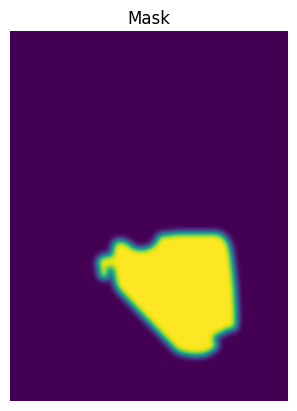

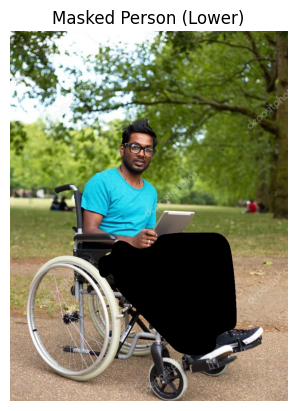

In [88]:
cloth_type = choices[1]

width, height = 768, 1024
person_image = resize_and_crop(person_image, (width, height))
# cloth_image = resize_and_padding(cloth_image, (width, height))

mask = resize_and_crop(person_image, (width, height))
mask = automasker(
            person_image,
            cloth_type
        )['mask']

mask = mask_processor.blur(mask, blur_factor=9)
vis_image(mask, title="Mask")
masked_person = vis_mask(person_image, mask)
vis_image(masked_person, title="Masked Person (Lower)")
lower_mask_with_bg = mask

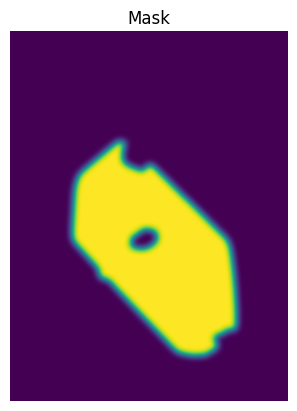

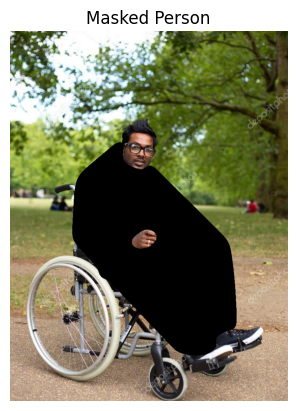

In [89]:
cloth_type = choices[2]

width, height = 768, 1024
person_image = resize_and_crop(person_image, (width, height))
# cloth_image = resize_and_padding(cloth_image, (width, height))

mask = resize_and_crop(person_image, (width, height))
mask = automasker(
            person_image,
            cloth_type
        )['mask']

mask = mask_processor.blur(mask, blur_factor=9)
vis_image(mask, title="Mask")
masked_person = vis_mask(person_image, mask)
vis_image(masked_person, title="Masked Person")

# Rembg 검증

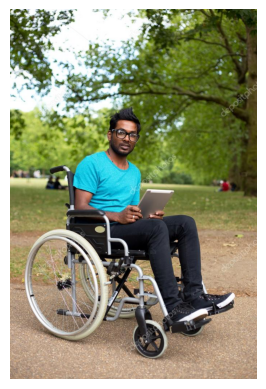

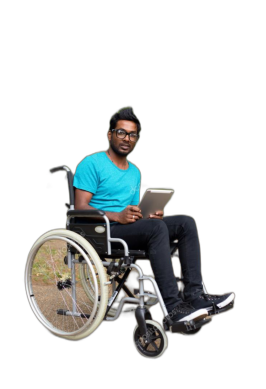

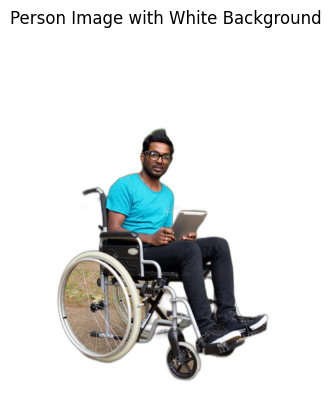

In [90]:
from rembg import remove

image_path = os.path.join("C:/Users/coldbrew/VTON-project/sample_img", "sample01.jpg")
person_image = Image.open(image_path).convert("RGB")
vis_image(person_image)
# Remove the background
person_image_no_bg = remove(person_image)
vis_image(person_image_no_bg)

# Create a white background image
white_bg = Image.new("RGB", person_image_no_bg.size, (255, 255, 255))

# Paste the image without background onto the white background
white_bg.paste(person_image_no_bg, (0, 0), person_image_no_bg)

vis_image(white_bg, title="Person Image with White Background")

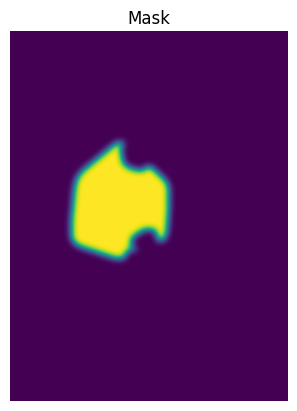

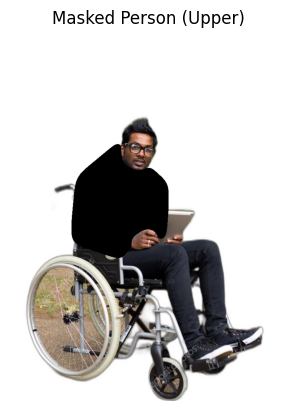

In [91]:
cloth_type = choices[0]

width, height = 768, 1024
person_image = resize_and_crop(white_bg, (width, height))

mask = resize_and_crop(person_image, (width, height))
mask = automasker(
            person_image,
            cloth_type
        )['mask']

mask = mask_processor.blur(mask, blur_factor=9)
vis_image(mask, title="Mask")
masked_person = vis_mask(person_image, mask)
vis_image(masked_person, title="Masked Person (Upper)")

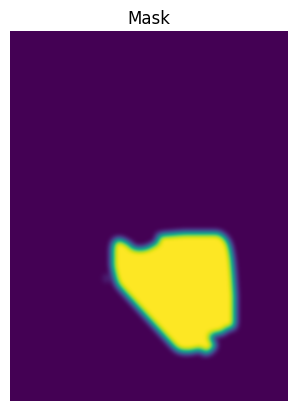

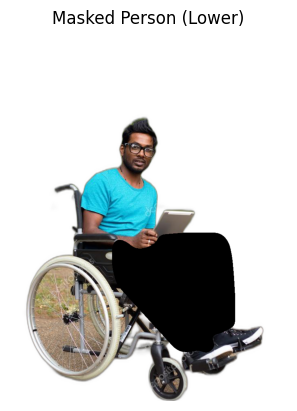

In [92]:
cloth_type = choices[1]

width, height = 768, 1024
person_image = resize_and_crop(white_bg, (width, height))

mask = resize_and_crop(person_image, (width, height))
mask = automasker(
            person_image,
            cloth_type
        )['mask']

mask = mask_processor.blur(mask, blur_factor=9)
vis_image(mask, title="Mask")
masked_person = vis_mask(person_image, mask)
vis_image(masked_person, title="Masked Person (Lower)")
lower_mask_without_bg = mask

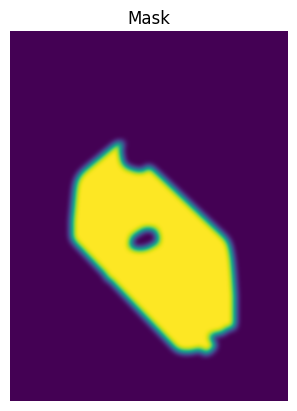

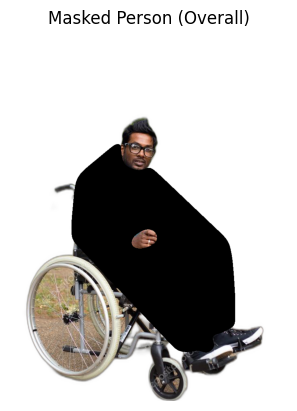

In [93]:
cloth_type = choices[2]

width, height = 768, 1024
person_image = resize_and_crop(white_bg, (width, height))

mask = resize_and_crop(person_image, (width, height))
mask = automasker(
            person_image,
            cloth_type
        )['mask']

mask = mask_processor.blur(mask, blur_factor=9)
vis_image(mask, title="Mask")
masked_person = vis_mask(person_image, mask)
vis_image(masked_person, title="Masked Person (Overall)")

### 백그라운드에 따른 차이 시각화

In [94]:
def highlight_mask_differences(mask_with_bg, mask_without_bg):
    # Ensure both masks are the same size
    if mask_with_bg.size != mask_without_bg.size:
        raise ValueError("Both masks must be the same size")

    # Convert masks to numpy arrays
    mask_with_bg_array = np.array(mask_with_bg)
    mask_without_bg_array = np.array(mask_without_bg)

    # Create an output image with 3 channels (RGB)
    output_image = np.zeros((mask_with_bg_array.shape[0], mask_with_bg_array.shape[1], 3), dtype=np.uint8)

    # Highlight areas where mask_with_bg is >= 1 in red
    red_areas = mask_with_bg_array >= 1
    output_image[red_areas] = [255, 0, 0]  # Red color

    # Highlight areas where mask_without_bg is >= 1 in blue
    blue_areas = mask_without_bg_array >= 1
    output_image[blue_areas] = [0, 0, 255]  # Blue color

    # Convert the output image back to PIL Image
    output_image_pil = Image.fromarray(output_image)

    return output_image_pil

In [95]:
# lower_mask_with_bg = np.array(lower_mask_with_bg)
# lower_mask_with_bg

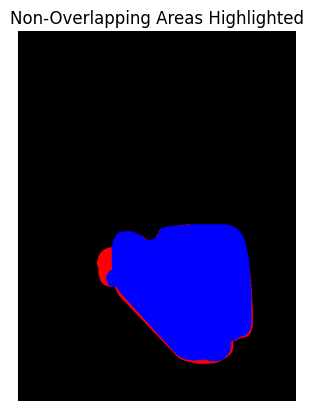

In [96]:
highlighted_image = highlight_mask_differences(lower_mask_with_bg, lower_mask_without_bg)
vis_image(highlighted_image, title="Non-Overlapping Areas Highlighted")

In [97]:
array = np.array(highlighted_image)

In [98]:
array.sum()

np.uint64(30724185)